# Статистический анализ влияния вышнее образования и запаса слов на мнении в отношении к эффекту прирожденной способности на человеческих различиях 

Мой друг в России сказал мне о наборе наданных из General Society Survey (GSS) который явялется соцальным научным 
изучением в Америке. В частности он вопросил если я могу проводить статистический анализ использующий такие данные. Он 
интересуется с степенью с которой отличие между реальным интеллектом и вышнее образованием относится в отношении к 
точке зрения на отличия в людях из-за прирожденной способности. В отношении к этому, в этом наборе надданных, существуют
три параметры - 1) racdif2 (DIFFERENCES DUE TO INBORN DISABILITY), 2) wordsum (NUMBER WORDS CORRECT IN VOCABULARY TEST), 3) degree (RS HIGHEST DEGREE).

Что моему другу интересует по более математическому языкому - эти величины

$$\mathbf{Корреляция}(wordsum,\mathrm{\;}racdif2\mathrm{\;}|\mathrm{\;}degree \in \{промежуток\mathrm{\;}малый\mathrm{\;}достаточно\})$$

и

$$\mathbf{Корреляция}(degree,\mathrm{\;}racdif2\mathrm{\;}|\mathrm{\;}wordsum \in \{промежуток\mathrm{\;}малый\mathrm{\;}достаточно\})$$

Ниже мы запустим код использующий библиотеку с функцией читающий sav файл.

In [77]:
#savFileName = "GSS7214_R3.sav"
savFileName = "GSS2008.sav"
import pyreadstat

df, meta = pyreadstat.read_sav(savFileName)

# done! let's see what we got
print(df.head())
print(meta.column_names)
print(meta.column_labels)
print(meta.column_names_to_labels)
#print(meta.number_rows)
#print(meta.number_columns)
#print(meta.file_label)
#print(meta.file_encoding)
df

   vpsu  vstrat  mar1  mar2  mar3  mar4  mar5  mar6  mar7  mar8  ...  \
0   1.0  2106.0   2.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1   1.0  2106.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2   1.0  2106.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3   1.0  2106.0   5.0   3.0   5.0   NaN   NaN   NaN   NaN   NaN  ...   
4   2.0  2106.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

   RELACTIV1  CONSENT    size  xnorcsiz  srcbelt   realinc   realrinc  \
0        1.0      1.0  8008.0       1.0      1.0   4016.25        NaN   
1        NaN      1.0  8008.0       1.0      1.0  64260.00  44178.750   
2        1.0      1.0  8008.0       1.0      1.0  24097.50  24097.500   
3        9.0      1.0  8008.0       1.0      1.0  20081.25   8701.875   
4        NaN      1.0  8008.0       1.0      1.0  17403.75  17403.750   

     coninc    conrinc  churhpow  
0   6228.75        NaN       1.0  
1  99660.00  68516.250       NaN  
2  37372.50  37372.500 

,vpsu,vstrat,mar1,mar2,mar3,mar4,mar5,mar6,mar7,mar8,...,RELACTIV1,CONSENT,size,xnorcsiz,srcbelt,realinc,realrinc,coninc,conrinc,churhpow
0,1.0,2106.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,8008.0,1.0,1.0,4016.250,NaN,6228.750,NaN,1.0
1,1.0,2106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,8008.0,1.0,1.0,64260.000,44178.750,99660.000,68516.250,NaN
2,1.0,2106.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,8008.0,1.0,1.0,24097.500,24097.500,37372.500,37372.500,2.0
3,1.0,2106.0,5.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9.0,1.0,8008.0,1.0,1.0,20081.250,8701.875,31143.750,13495.625,4.0
4,2.0,2106.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,8008.0,1.0,1.0,17403.750,17403.750,26991.250,26991.250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2.0,2234.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,8.0,1.0,0.0,8.0,6.0,12718.125,8701.875,19724.375,13495.625,3.0
2019,1.0,2235.0,2.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,4.0,8.0,6.0,NaN,NaN,NaN,NaN,2.0
2020,1.0,2236.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,5.0,10.0,6.0,44178.750,17403.750,68516.250,26991.250,4.0
2021,2.0,2237.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,3.0,10.0,5.0,53550.000,14726.250,83050.000,22838.750,2.0


Мы можем теперь создать гистограмы для параметров которые интересуют нас.

array([[<AxesSubplot:title={'center':'wordsum'}>,
        <AxesSubplot:title={'center':'degree'}>],
       [<AxesSubplot:title={'center':'racdif2'}>, <AxesSubplot:>]],
      dtype=object)

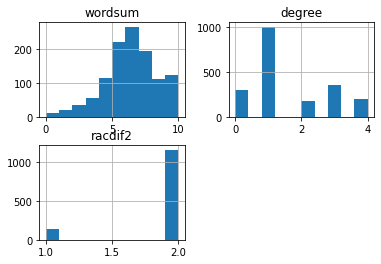

In [78]:
import matplotlib
#print(matplotlib.get_cachedir())

df.hist(column=["wordsum", "degree", "racdif2"])

Мы фильтруем данные, требуя что величины троих параметров все сущестуют, который конечно необходимо чтобы использовать
эту точку данных как часть анализа.

In [79]:
filtered_df = df[['wordsum', 'degree', 'racdif2']]
filtered_df = filtered_df[df['wordsum'].notnull() & df['degree'].notnull() & df['racdif2'].notnull()]
filtered_df

,wordsum,degree,racdif2
0,3.0,1.0,2.0
1,7.0,4.0,2.0
2,5.0,1.0,2.0
4,6.0,1.0,2.0
5,5.0,3.0,2.0
...,...,...,...
2014,5.0,3.0,2.0
2015,6.0,1.0,2.0
2017,7.0,3.0,2.0
2020,3.0,1.0,2.0


array([[<AxesSubplot:title={'center':'wordsum'}>,
        <AxesSubplot:title={'center':'degree'}>],
       [<AxesSubplot:title={'center':'racdif2'}>, <AxesSubplot:>]],
      dtype=object)

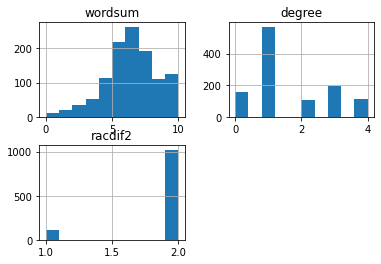

In [80]:
filtered_df.hist(column=["wordsum", "degree", "racdif2"])

In [81]:
filtered_df.corr()

,wordsum,degree,racdif2
wordsum,1.000000,0.409204,0.226848
degree,0.409204,1.000000,0.163980
racdif2,0.226848,0.163980,1.000000


In [94]:
print("корреляция между degree и racdif2 при условии wordsum = некоторая величина")

num_points_total = 0
total_correlation = 0
wordsums = []
correlations = []

for wordsum_score in range(11):
    given_wordsum_df = filtered_df[filtered_df.wordsum == wordsum_score]
    num_points = given_wordsum_df.shape[0]
    correlation = given_wordsum_df["degree"].corr(filtered_df["racdif2"])
    if str(correlation) != 'nan':
        total_correlation += correlation*num_points
        num_points_total += num_points
        wordsums.append(wordsum_score)
        correlations.append(correlation)
    print("wordsum = %s, количество точек = %s, корреляция = %f" % (wordsum_score, num_points, correlation))

print("общое количество точек = " + str(num_points_total))
print("корреляция среднее = " + str(total_correlation/num_points_total))

корреляция между degree и racdif2 при условии wordsum = некоторая величина
wordsum = 0, количество точек = 10, корреляция = -0.252646
wordsum = 1, количество точек = 19, корреляция = -0.035806
wordsum = 2, количество точек = 35, корреляция = 0.270454
wordsum = 3, количество точек = 53, корреляция = 0.243531
wordsum = 4, количество точек = 112, корреляция = 0.023573
wordsum = 5, количество точек = 218, корреляция = 0.160961
wordsum = 6, количество точек = 262, корреляция = -0.004761
wordsum = 7, количество точек = 192, корреляция = 0.162288
wordsum = 8, количество точек = 111, корреляция = 0.047573
wordsum = 9, количество точек = 80, корреляция = 0.000000
wordsum = 10, количество точек = 44, корреляция = 0.245980
общое количество точек = 1136
корреляция среднее = 0.0905912106195397


In [95]:
print("корреляция между wordsum и racdif2 при условии degree = некоторая величина")

num_points_total = 0
total_correlation = 0
degrees = []
correlations2 = []

for degree_score in range(5):
    given_degree_df = filtered_df[filtered_df.degree == degree_score]
    num_points = given_degree_df.shape[0]
    correlation = given_degree_df["wordsum"].corr(filtered_df["racdif2"])
    if str(correlation) != 'nan':
        total_correlation += correlation*num_points
        num_points_total += num_points
        degrees.append(degree_score)
        correlations2.append(correlation)
    print("degree = %s, количество точек = %s, корреляция = %f" % (str(degree_score), str(num_points), correlation))

print("общое количество точек = " + str(num_points_total))
print("корреляция среднее = " + str(total_correlation/num_points_total))

корреляция между wordsum и racdif2 при условии degree = некоторая величина
degree = 0, количество точек = 157, корреляция = 0.208395
degree = 1, количество точек = 569, корреляция = 0.178985
degree = 2, количество точек = 107, корреляция = 0.144432
degree = 3, количество точек = 193, корреляция = 0.060149
degree = 4, количество точек = 110, корреляция = 0.314385
общое количество точек = 1136
корреляция среднее = 0.17271662329776302


Мы отметим что между $wordsum$ и $racdif2$ положительная корреляция которая маленькая, но конечно не ничтожная (корреляция среднее = 0.17271662329776302), но между $degree$ и $racdif2$ сущестует очень маленькая положительная корреляция и вероятно еще статистически значимая (корреляция среднее = 0.0905912106195397). Для этого мы создаем следующие графы:

Text(0, 0.5, 'корреляция между degree и racdif2')

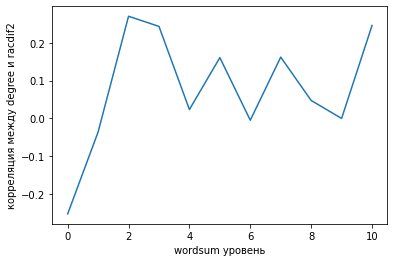

In [98]:
import matplotlib.pyplot as plt

plt.plot(wordsums, correlations)
plt.xlabel('wordsum уровень')
plt.ylabel('корреляция между degree и racdif2')

Text(0, 0.5, 'корреляция между wordsum и racdif2')

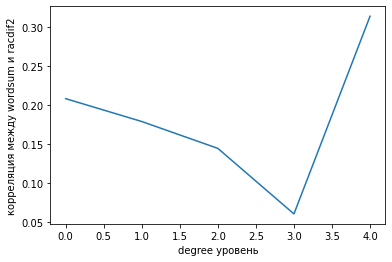

In [97]:
plt.plot(degrees, correlations2)
plt.xlabel('degree уровень')
plt.ylabel('корреляция между wordsum и racdif2')